In [210]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading Data

In [211]:
bnb_df = pd.read_csv('AB_NYC_2019.csv')

In [212]:
bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [213]:
bnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [214]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [215]:
print(f'Number of rows: {bnb_df.shape[0]}')
print(f'Number of columns: {bnb_df.shape[1]}')

Number of rows: 48895
Number of columns: 16


## 1.1 Cleaning Data

In [216]:
drop_list = ['id', 'host_id', 'host_name', 'last_review', 'name', 'neighbourhood']

In [217]:
bnb_df.drop(drop_list, axis=1, inplace=True)

In [218]:
bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group                0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [219]:
# replace the missing values in 'reviews_per_month' with 0
bnb_df['reviews_per_month'].fillna(0, inplace=True)

/var/folders/cn/z9gkn6nx58gbgcpgjdrsx7xh0000gn/T/ipykernel_75384/2967768345.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bnb_df['reviews_per_month'].fillna(0, inplace=True)


In [220]:
bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group               0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

## 1.2 Statistics of the Data

In [221]:
bnb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,48895.0,1.090910,1.597283,0.00000,0.04000,0.37000,1.580000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [222]:
bnb_df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

# 2. Exploratory Data Analysis

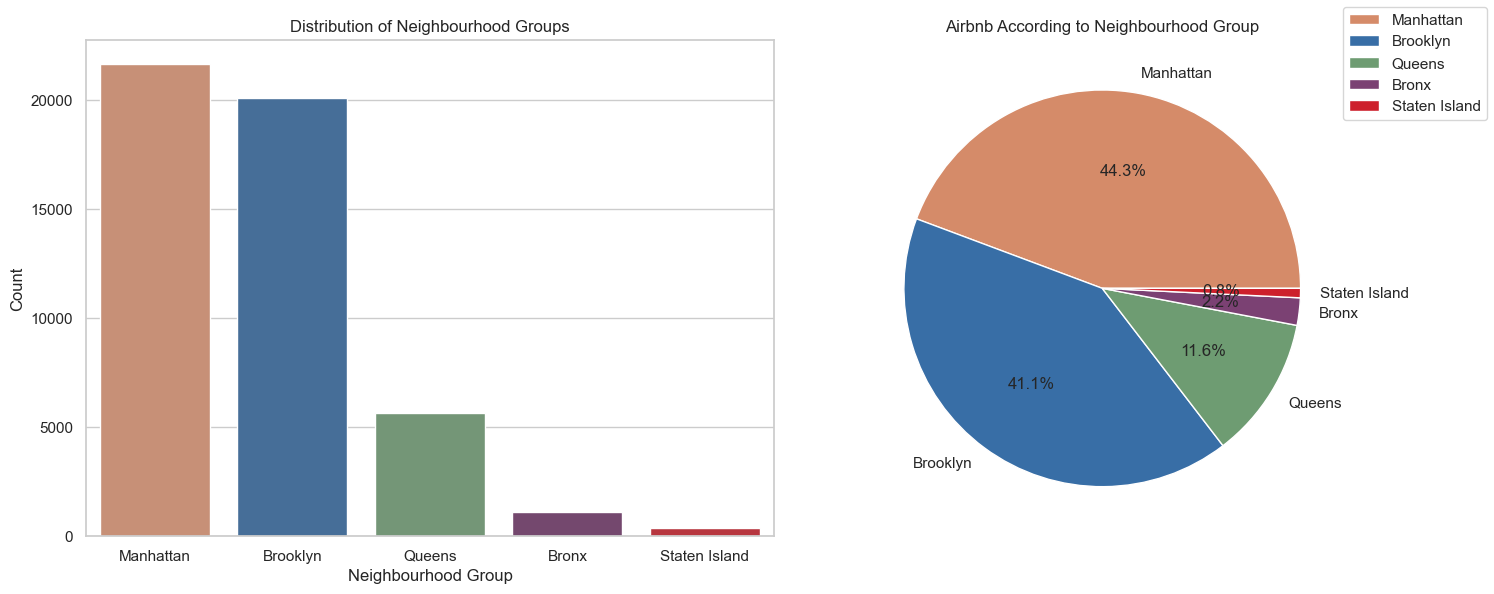

In [223]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

labels = bnb_df.neighbourhood_group.value_counts().index
colors = ['#D58B69','#386EA6','#6E9C72','#7B4173','#CD202C']
explode = [0,0,0,0,0]
sizes = bnb_df.neighbourhood_group.value_counts().values

sns.countplot(x='neighbourhood_group', hue='neighbourhood_group',order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')

fig.legend()

plt.tight_layout()
plt.show()

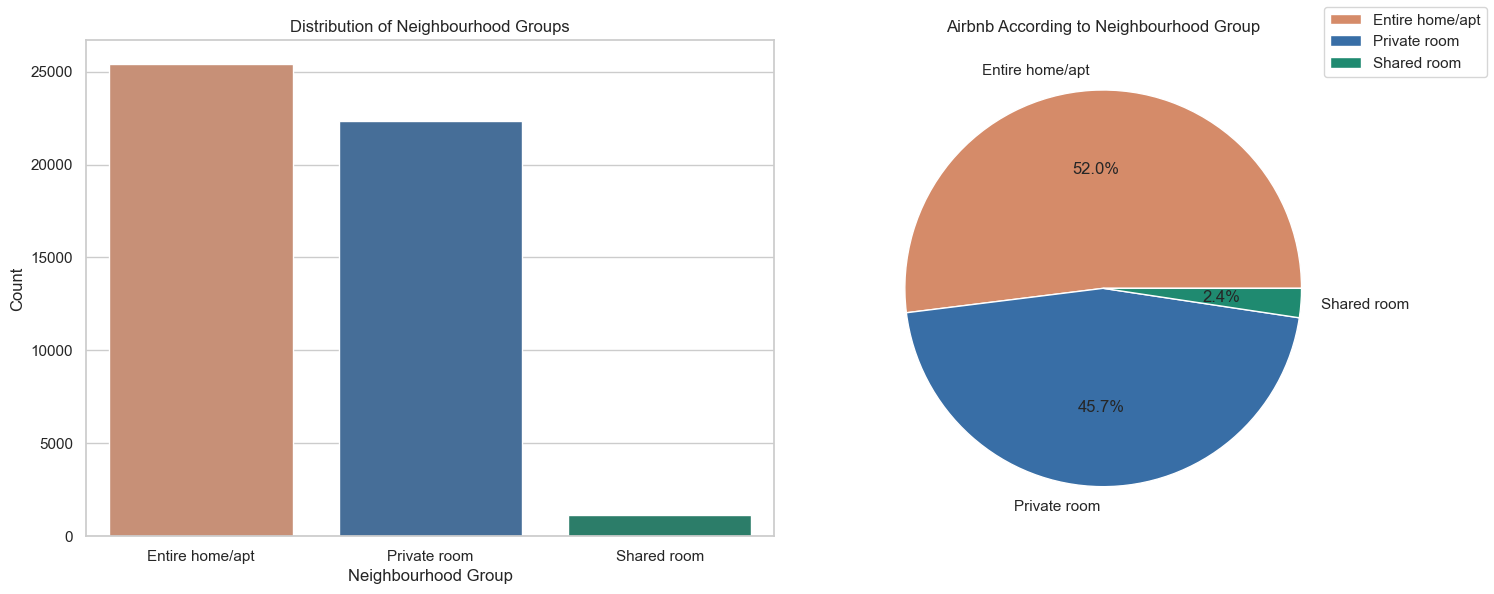

In [224]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

labels = bnb_df.room_type.value_counts().index
colors = ['#D58B69','#386EA6','#1F8A70']
explode = [0,0,0]
sizes = bnb_df.room_type.value_counts().values

sns.countplot(x='room_type', hue='room_type', order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')

fig.legend()

plt.tight_layout()
plt.show()

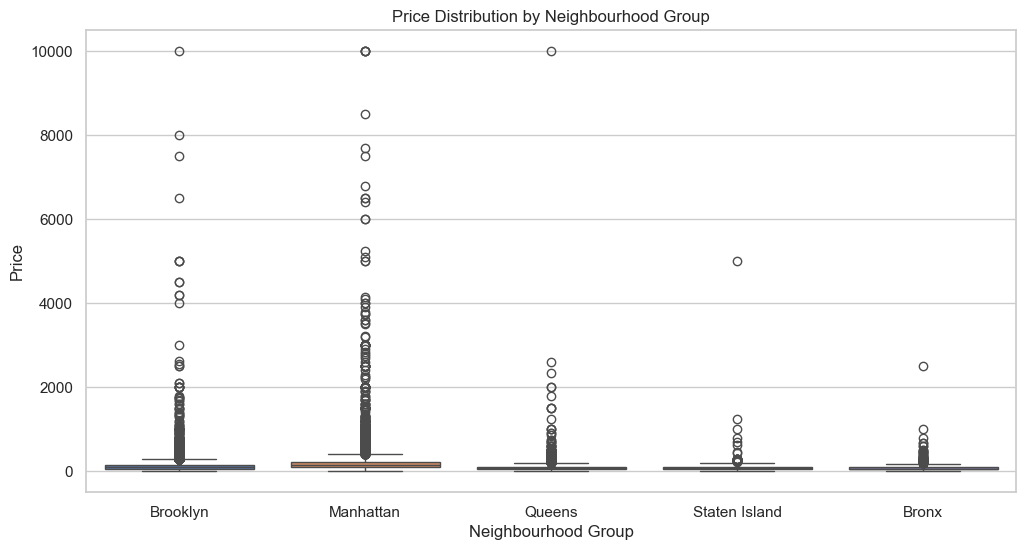

In [225]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=bnb_df, hue='neighbourhood_group')
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

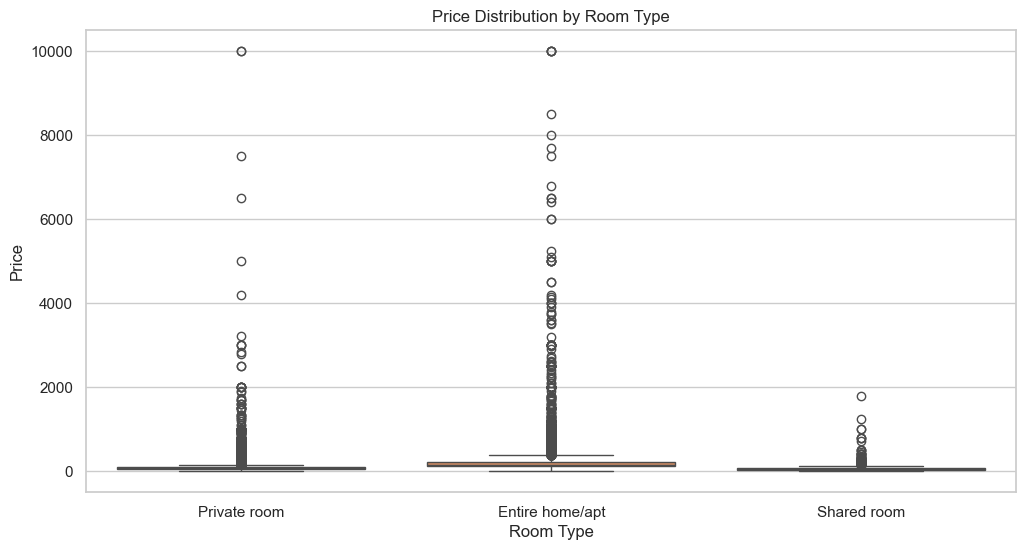

In [226]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=bnb_df, hue='room_type')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type') 
plt.ylabel('Price')
plt.show()

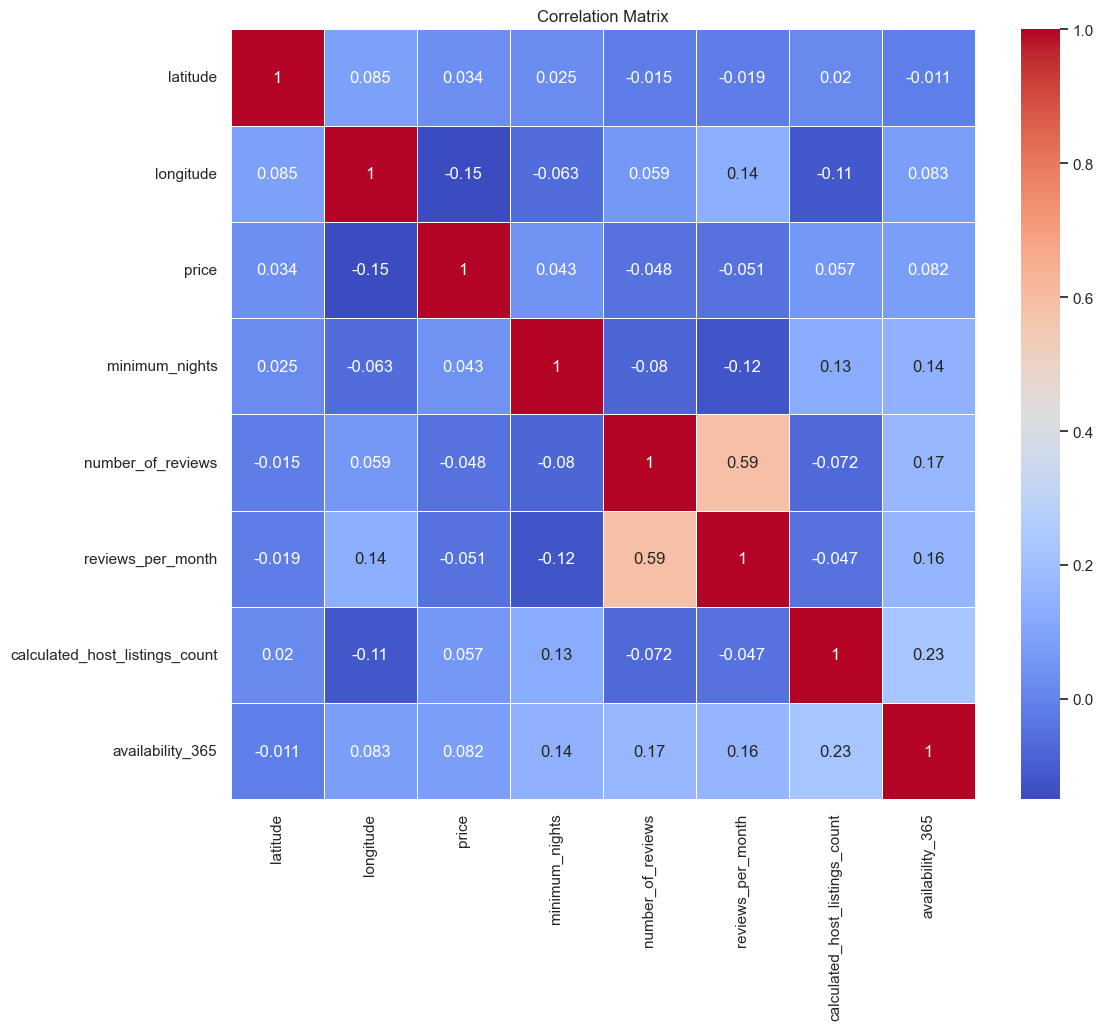

In [227]:
plt.figure(figsize=(12, 10))
corr_matrix = bnb_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


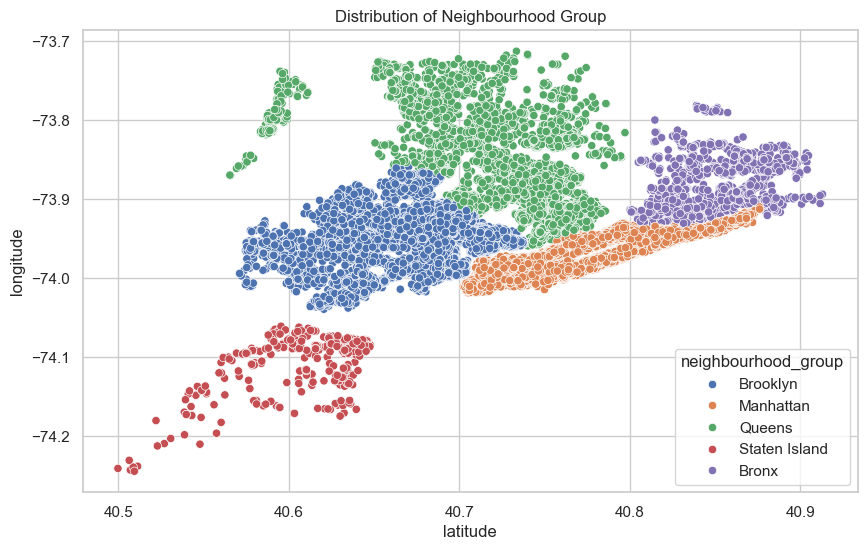

In [228]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'neighbourhood_group')
plt.title('Distribution of Neighbourhood Group')

plt.show()

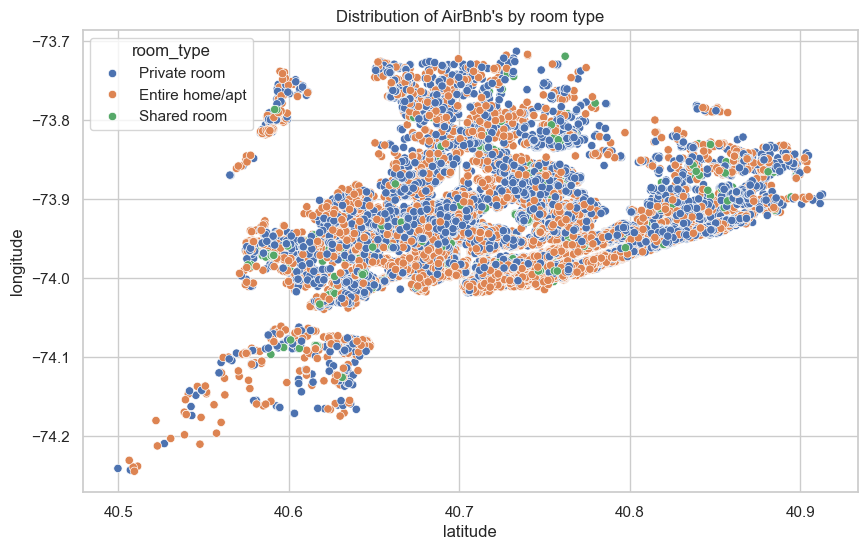

In [229]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'room_type')
plt.title("Distribution of AirBnb's by room type")

plt.show()

<Figure size 1000x1000 with 0 Axes>

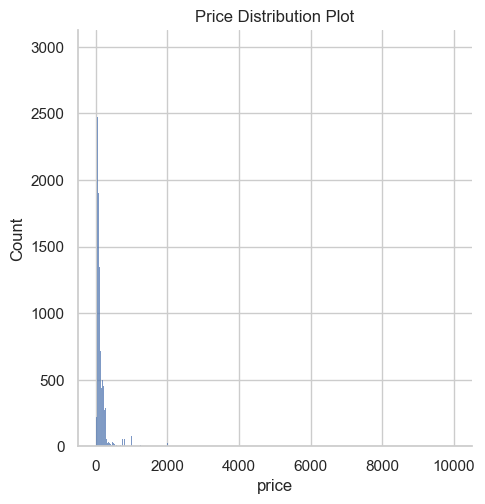

In [230]:
plt.figure(figsize=(10,10))
sns.displot(bnb_df['price'])
plt.title("Price Distribution Plot")
plt.show()

<Figure size 1000x600 with 0 Axes>

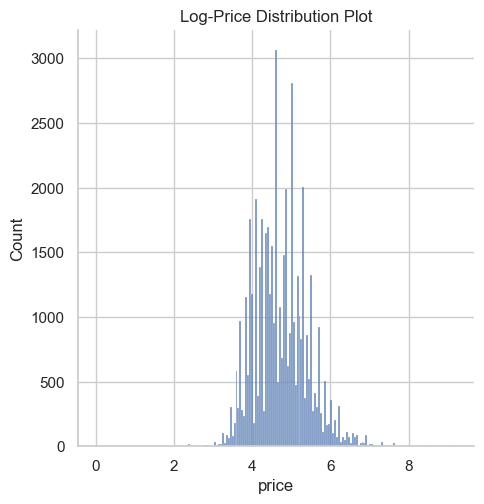

In [231]:
plt.figure(figsize=(10,6))
sns.displot(np.log1p(bnb_df['price']))
plt.title("Log-Price Distribution Plot")
plt.show()

### Outlier Distribution

<Figure size 1000x600 with 0 Axes>

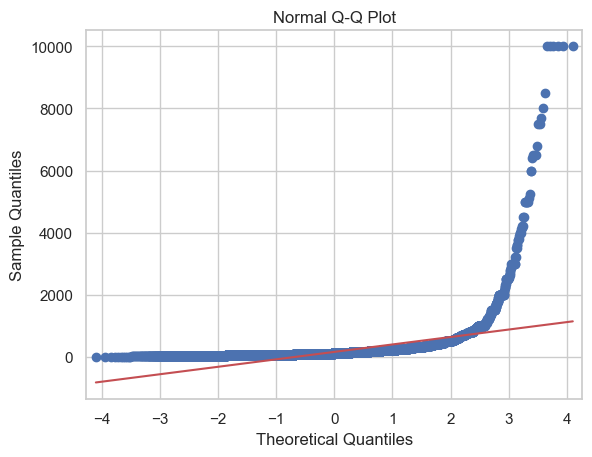

In [232]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sm.qqplot(bnb_df['price'], line='s')
plt.title('Normal Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


The plot shows significant deviation from the straight line (red), especially in the upper tail. The data points form a curve, indicating that the data does not follow a normal distribution. Moreover, the extreme deviation in the upper tail suggests that the data has heavy tails. This means there are more extreme values in the dataset than would be expected in a normal distribution. The sharp curve on the right side suggests that the data is positively skewed, as we have shown in the graph above.

<Figure size 1000x600 with 0 Axes>

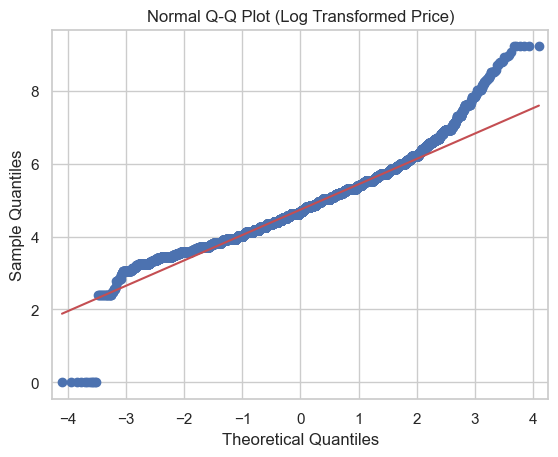

In [233]:
plt.figure(figsize=(10, 6))
sm.qqplot(np.log1p(bnb_df['price']), line='s')
plt.title('Normal Q-Q Plot (Log Transformed Price)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Feature Engeneering

In [234]:
# encoding the categorical variables
bnb_df = pd.get_dummies(bnb_df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [235]:
bnb_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,True,False,False,False,True,False
1,40.75362,-73.98377,225,1,45,0.38,2,355,False,True,False,False,False,False
2,40.80902,-73.94190,150,3,0,0.00,1,365,False,True,False,False,True,False
3,40.68514,-73.95976,89,1,270,4.64,1,194,True,False,False,False,False,False
4,40.79851,-73.94399,80,10,9,0.10,1,0,False,True,False,False,False,False


In [236]:
# transforms booleans into 0 and 1
for col in bnb_df.select_dtypes(include=['bool']).columns:
    bnb_df[col] = bnb_df[col].astype(int)

In [237]:
bnb_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0


In [238]:
print(bnb_df['price'].max(),
      bnb_df['minimum_nights'].max(),
      bnb_df['number_of_reviews'].max())

10000 1250 629


In [239]:
bnb_df['price'] = np.clip(bnb_df['price'], bnb_df['price'].quantile(0.05), bnb_df['price'].quantile(0.95))
bnb_df['minimum_nights'] = np.clip(bnb_df['minimum_nights'], bnb_df['minimum_nights'].quantile(0.05), bnb_df['minimum_nights'].quantile(0.95))
bnb_df['number_of_reviews'] = np.clip(bnb_df['number_of_reviews'], bnb_df['number_of_reviews'].quantile(0.05), bnb_df['number_of_reviews'].quantile(0.95))

In [240]:
print(bnb_df['price'].max(),
      bnb_df['minimum_nights'].max(),
      bnb_df['number_of_reviews'].max())

355 30 114


In [241]:
bnb_df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,114,4.64,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,0.00,2,9,1,0,0,0,1,0
48891,40.70184,-73.93317,40,4,0,0.00,2,36,1,0,0,0,1,0
48892,40.81475,-73.94867,115,10,0,0.00,1,27,0,1,0,0,0,0
48893,40.75751,-73.99112,55,1,0,0.00,6,2,0,1,0,0,0,1


In [242]:
bnb_df['log_price'] = np.log1p(bnb_df['price'])

# Model

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV


class Model:
    def __init__(self, model, name=None, scaled=False):
        self.model = model
        self.name = name
        self.scaled = scaled

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        
    def __get_predictions(self, X_test):
        return self.model.predict(X_test)

    def get_metrics(self, X_test, y_test) -> pd.Series:
        y_pred = self.__get_predictions(X_test)
        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        r2 = metrics.r2_score(y_test, y_pred)
        metrics_series = pd.Series({
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R^2': r2,
            'Name': self.name if self.name else type(self.model).__name__
        })
        return metrics_series
    def cross_validate(self, X, y, cv):

        kf = KFold(n_splits=cv, shuffle=True, random_state=42)
        mse_scores = cross_val_score(self.model, X, y, scoring='neg_mean_squared_error', cv=kf)
        rmse_scores = np.sqrt(-mse_scores)
        mae_scores = cross_val_score(self.model, X, y, scoring='neg_mean_absolute_error', cv=kf)
        r2_scores = cross_val_score(self.model, X, y, scoring='r2', cv=kf)

        metrics_series = pd.Series({
            'MSE': -np.mean(mse_scores),
            'RMSE': np.mean(rmse_scores),
            'MAE': -np.mean(mae_scores),
            'R^2': np.mean(r2_scores),
            'Name': self.name if self.name else type(self.model).__name__
        })
        return metrics_series

    def visualize_metrics(self, X_test, y_test):
        y_pred = self.__get_predictions(X_test)

        # Plot residuals
        residuals = y_test - y_pred
        
        plt.figure(figsize=(15, 10))
        
        # Plot Residuals Distribution
        plt.subplot(2, 2, 1)
        sns.histplot(residuals, bins=30, edgecolor='black', kde=True)
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title('Distribution of Residuals')

        # Plot Predicted vs Actual values
        plt.subplot(2, 2, 2)
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Actual vs Predicted')

        # Plot Residuals vs Fitted values
        plt.subplot(2, 2, 3)
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicted')
        plt.ylabel('Residuals')
        plt.title('Residuals vs Fitted Values')

        # QQ Plot for Residuals
        plt.subplot(2, 2, 4)
        stats.probplot(residuals, dist="norm", plot=plt)
        plt.title('Normal Q-Q Plot (Residuals)')

        plt.tight_layout()
        plt.show()


In [244]:
metrics_df = pd.DataFrame(columns=['Name',
            'MSE',
            'RMSE',
            'MAE',
            'R^2'])

In [245]:
X = bnb_df.drop(['price', 'log_price'],axis=1)
y = bnb_df['log_price']

In [246]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [248]:
#from sklearn.preprocessing import PolynomialFeatures

#Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
#X_train = Poly.fit_transform(X_train)
#X_test = Poly.fit_transform(X_test)

In [249]:
lr_model = Model(LinearRegression(), name='Linear Regression')
lr_model.fit(X_train,y_train)

In [250]:
lr_model.get_metrics(X_test,y_test)

MSE              0.162226
RMSE             0.402772
MAE              0.316603
R^2              0.563848
Name    Linear Regression
dtype: object

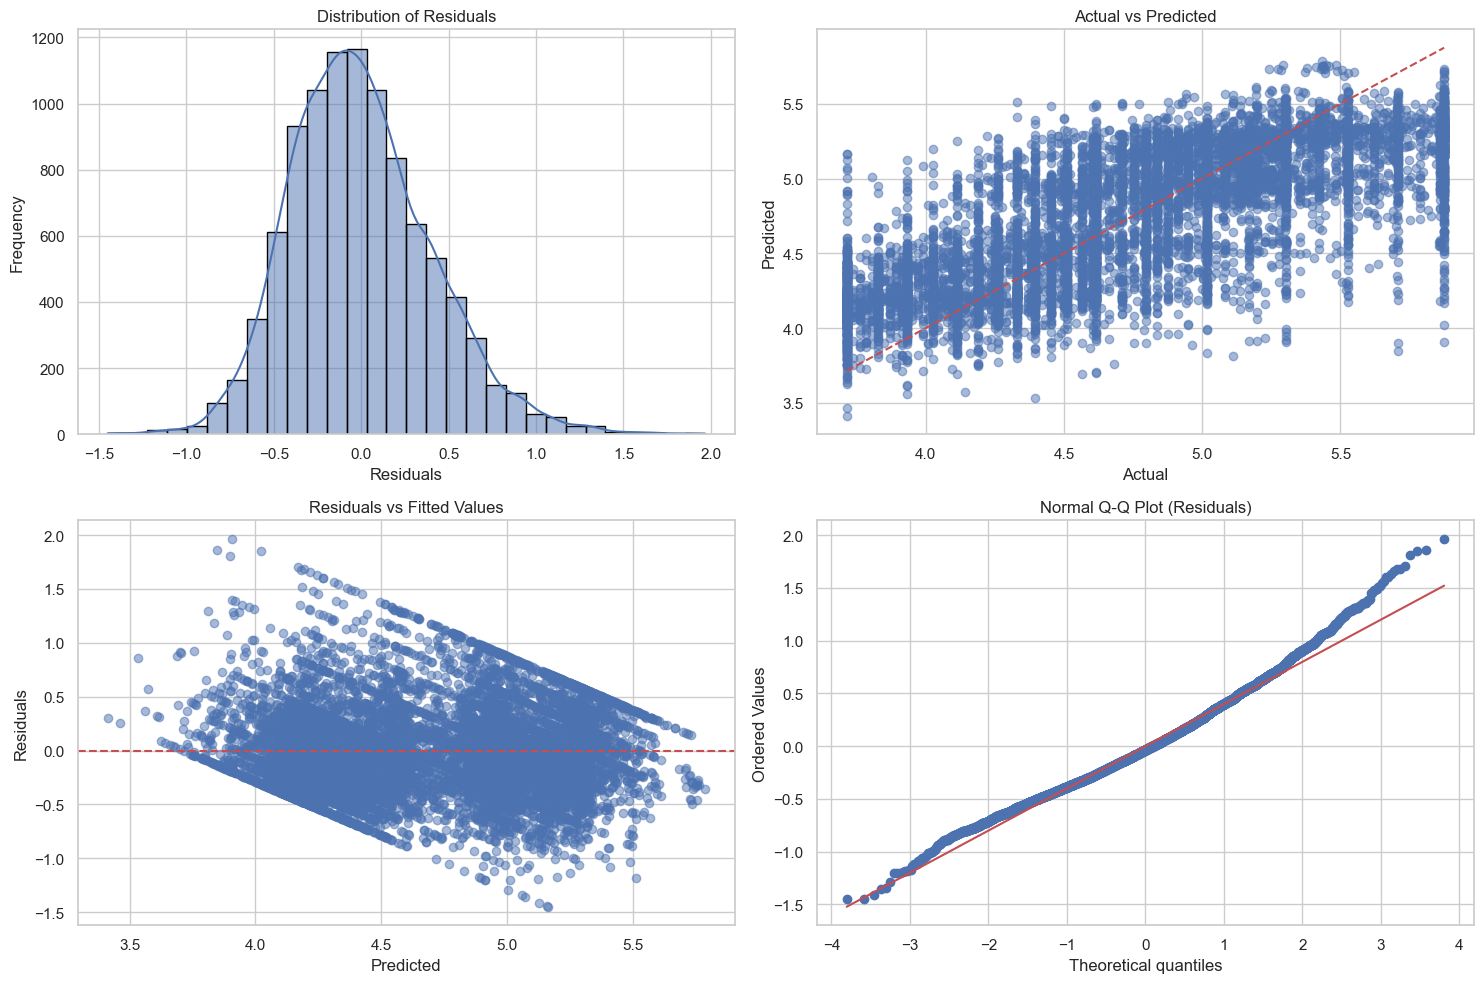

In [251]:
lr_model.visualize_metrics(X_test,y_test)

In [252]:
from sklearn.metrics import mean_squared_error, r2_score
# Define the range of alpha values to test
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Dictionary to store the results
ridge_results = {}
lasso_results = {}

# Test different alpha values for Ridge regression
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    ridge_results[alpha] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }

# Test different alpha values for Lasso regression
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    lasso_results[alpha] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }

print("Risultati della Regressione Ridge:")
for alpha, performance in ridge_results.items():
    print(f"Alpha: {alpha}, MSE: {performance['MSE']}, R^2: {performance['R^2']}")

print("\nRisultati della Regressione Lasso:")
for alpha, performance in lasso_results.items():
    print(f"Alpha: {alpha}, MSE: {performance['MSE']}, R^2: {performance['R^2']}")

Risultati della Regressione Ridge:
Alpha: 0.0001, MSE: 0.16222557116384287, R^2: 0.5638484520938694
Alpha: 0.001, MSE: 0.16222556475592745, R^2: 0.56384846932187
Alpha: 0.01, MSE: 0.16222550129835034, R^2: 0.5638486399307345
Alpha: 0.1, MSE: 0.16222492848891604, R^2: 0.5638501799574986
Alpha: 1, MSE: 0.1622250043829794, R^2: 0.56384997591252
Alpha: 10, MSE: 0.16256060971065223, R^2: 0.562947684232485
Alpha: 100, MSE: 0.16640133496708204, R^2: 0.5526217026153071

Risultati della Regressione Lasso:
Alpha: 0.0001, MSE: 0.16223214297713093, R^2: 0.5638307834457175
Alpha: 0.001, MSE: 0.16403321583929495, R^2: 0.5589885091292277
Alpha: 0.01, MSE: 0.1774462205134994, R^2: 0.5229269763587989
Alpha: 0.1, MSE: 0.26824250037022823, R^2: 0.2788166445564546
Alpha: 1, MSE: 0.36390998917364775, R^2: 0.021609824284191115
Alpha: 10, MSE: 0.3720514318114111, R^2: -0.000278850745118131
Alpha: 100, MSE: 0.3720514318114111, R^2: -0.000278850745118131


In [253]:
best_ridge_alpha = max(ridge_results, key=lambda x: (ridge_results[x]['R^2'], -ridge_results[x]['MSE']))
best_lasso_alpha = max(lasso_results, key=lambda x: (lasso_results[x]['R^2'], -lasso_results[x]['MSE']))

print(f"\nMiglior Alpha per Ridge: {best_ridge_alpha} con R^2: {ridge_results[best_ridge_alpha]['R^2']} e MSE: {ridge_results[best_ridge_alpha]['MSE']}")
print(f"Miglior Alpha per Lasso: {best_lasso_alpha} con R^2: {lasso_results[best_lasso_alpha]['R^2']} e MSE: {lasso_results[best_lasso_alpha]['MSE']}")


Miglior Alpha per Ridge: 0.1 con R^2: 0.5638501799574986 e MSE: 0.16222492848891604
Miglior Alpha per Lasso: 0.0001 con R^2: 0.5638307834457175 e MSE: 0.16223214297713093


In [254]:
lasso_model = Model(Lasso(alpha=best_lasso_alpha), name='Lasso')
lasso_model.fit(X_train, y_train)

In [255]:
lasso_model.get_metrics(X_test,y_test)

MSE     0.162232
RMSE    0.402781
MAE     0.316682
R^2     0.563831
Name       Lasso
dtype: object

## Random Forest Regressor

In [256]:
rf_model = Model(RandomForestRegressor(n_estimators=100, random_state=42), name='Random Forest Regressor')

In [257]:
rf_model.fit(X_train, y_train)

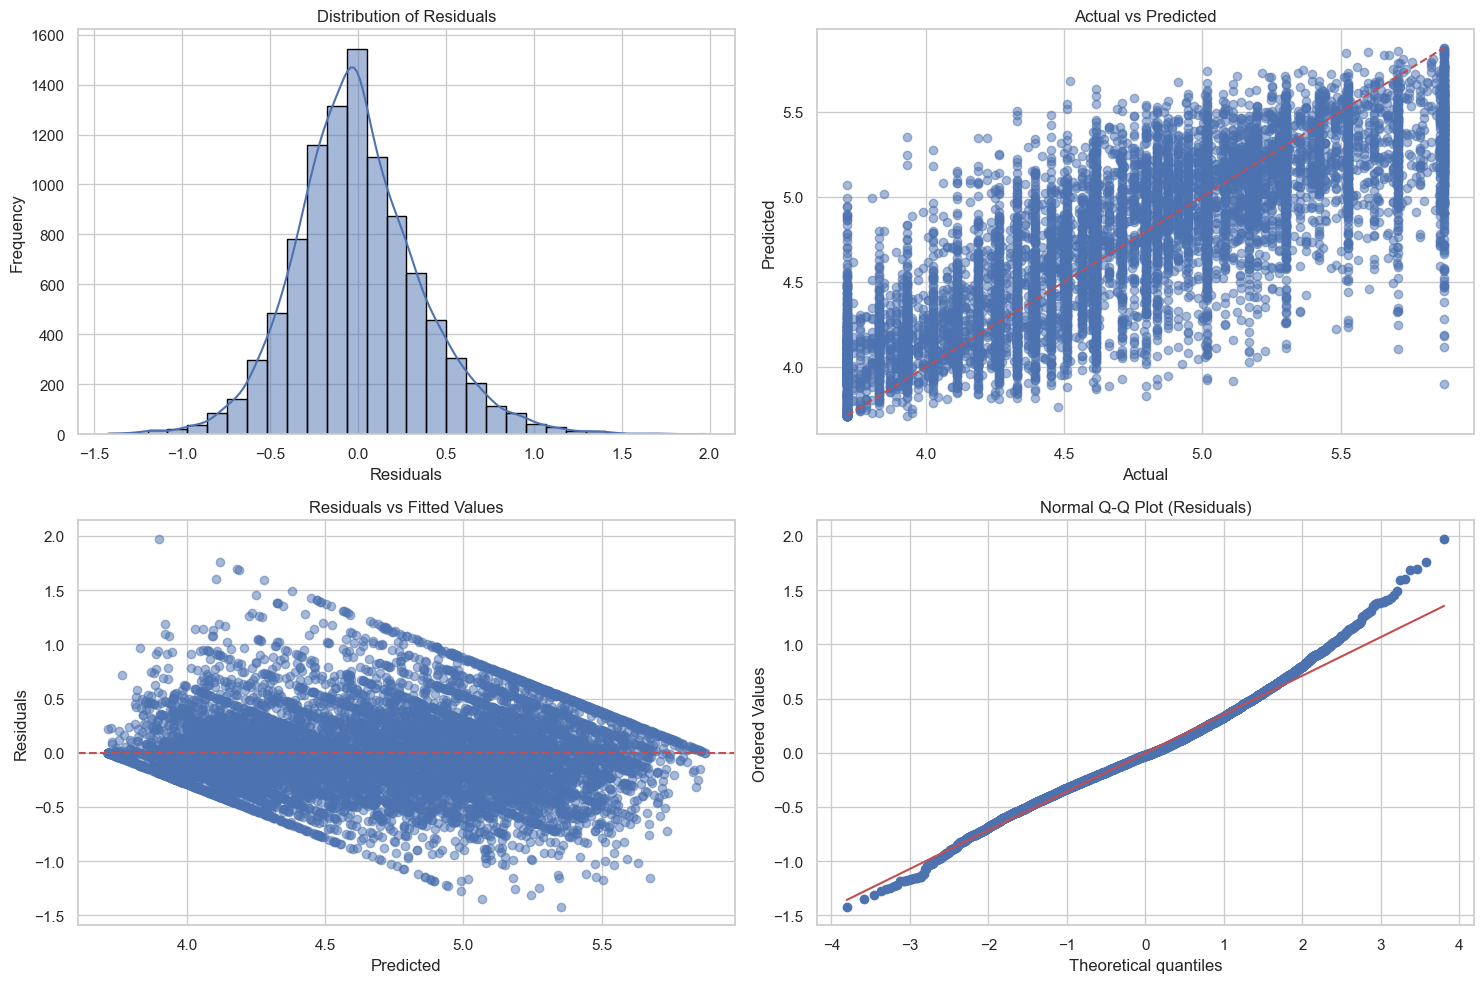

In [258]:
rf_model.visualize_metrics(X_test, y_test)

In [259]:
metrics_rf = rf_model.get_metrics(X_test, y_test)
print(metrics_rf)

MSE                    0.128637
RMSE                   0.358661
MAE                    0.273568
R^2                    0.654152
Name    Random Forest Regressor
dtype: object


In [260]:
#rf_model.cross_validate(X,y,5)

In [261]:
metrics_df = pd.concat([metrics_df, metrics_rf.to_frame().T])

Text(0.5, 1.0, 'Feature importance Random Forest Regressor')

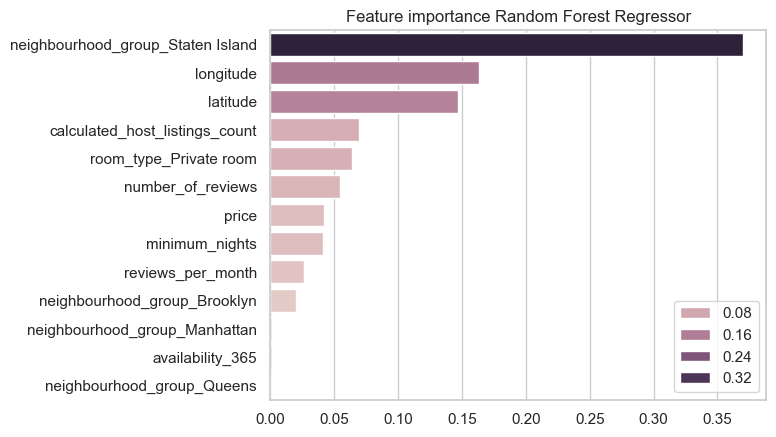

In [262]:
sorted_idx = rf_model.model.feature_importances_.argsort()[::-1]
cols  = []
columns = bnb_df.columns
for i in sorted_idx:
    cols.append(columns[i])

sns.barplot(y=cols, x=rf_model.model.feature_importances_[sorted_idx], hue=rf_model.model.feature_importances_[sorted_idx])
plt.title('Feature importance Random Forest Regressor')

## Decision Tree

In [263]:
max_d = []
for i in range(1,10):
    dtree = DecisionTreeRegressor(max_depth=i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    max_d.append(round(metrics.r2_score(y_test,y_pred),5))
print(f'Best max depth: {max_d.index(max(max_d))}')
print(f'R^2: {max(max_d)}')

Best max depth: 8
R^2: 0.61843


In [264]:
dt_model = Model(DecisionTreeRegressor(max_depth=max_d.index(max(max_d))), name= 'Decision Tree')

In [265]:
dt_model.fit(X_train, y_train)

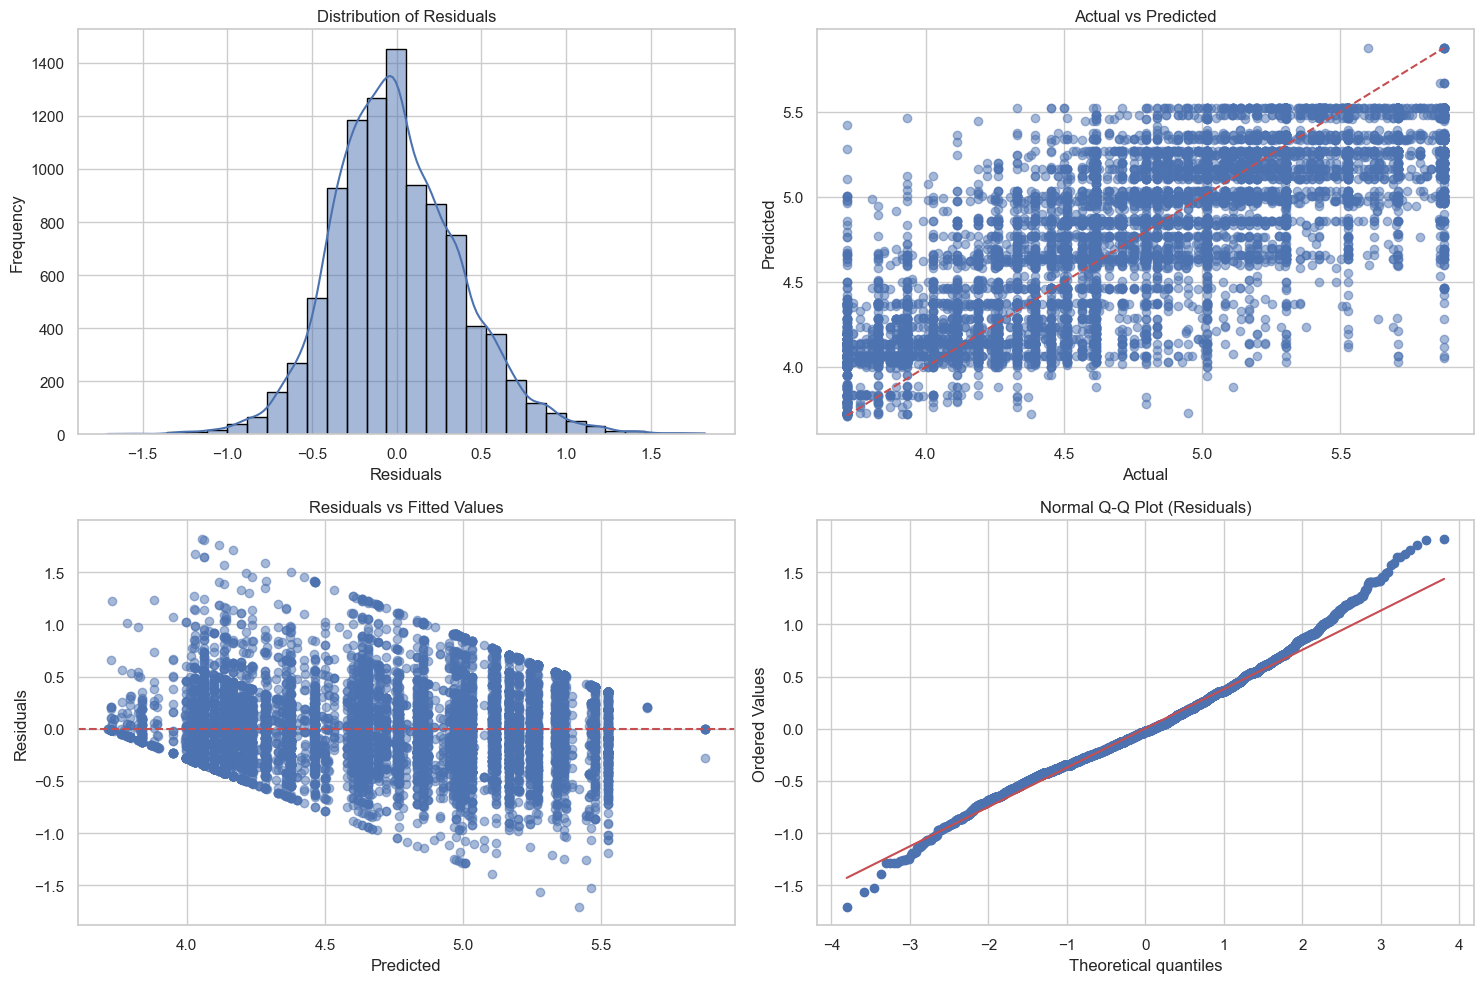

In [266]:
dt_model.visualize_metrics(X_test, y_test)

In [267]:
metrics_dt = dt_model.get_metrics(X_test, y_test)
print(metrics_dt)

MSE          0.143512
RMSE          0.37883
MAE           0.29363
R^2           0.61416
Name    Decision Tree
dtype: object


In [268]:
dt_model.cross_validate(X,y, 5)

MSE          0.146283
RMSE         0.382457
MAE           0.29478
R^2          0.608552
Name    Decision Tree
dtype: object

In [269]:
metrics_df = pd.concat([metrics_df, metrics_dt.to_frame().T])

## XGBoost Regressor

In [270]:
xgb_model = Model(XGBRegressor(), name='XGB Regressor')

In [271]:
xgb_model.fit(X_train, y_train)

In [272]:
#xgb_model.cross_validate(X_test, y_test, 5)

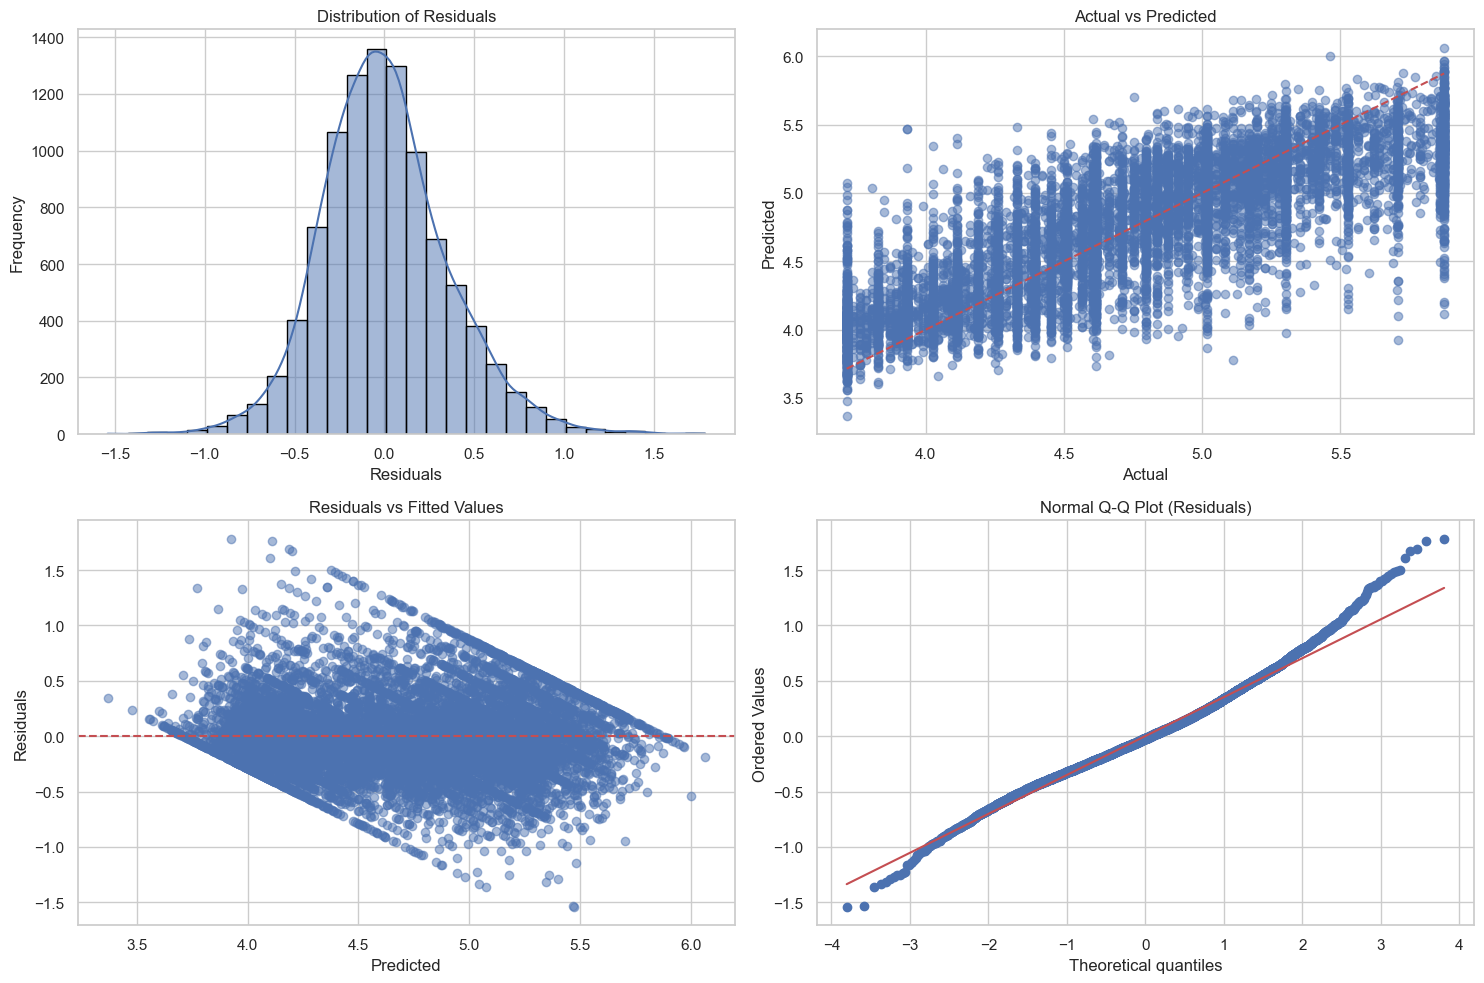

In [273]:
xgb_model.visualize_metrics(X_test, y_test)

In [274]:
metrics_xgb = xgb_model.get_metrics(X_test, y_test)
print(metrics_xgb)

MSE          0.125012
RMSE         0.353571
MAE           0.27191
R^2          0.663898
Name    XGB Regressor
dtype: object


In [275]:
xgb_model.cross_validate(X,y,5)

MSE          0.128681
RMSE         0.358708
MAE          0.275515
R^2          0.655615
Name    XGB Regressor
dtype: object

In [276]:
metrics_df = pd.concat([metrics_df, metrics_xgb.to_frame().T])

Text(0.5, 1.0, 'Feature importance XGBoost')

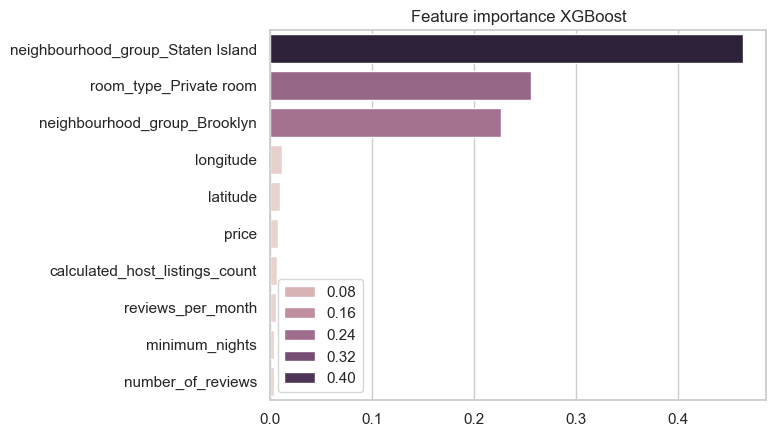

In [277]:
sorted_idx = xgb_model.model.feature_importances_.argsort()[::-1]
cols  = []
columns = bnb_df.columns
for i in sorted_idx:
    cols.append(columns[i])

sns.barplot(y=cols[:10], x=xgb_model.model.feature_importances_[sorted_idx][:10], hue=xgb_model.model.feature_importances_[sorted_idx][:10])
plt.title('Feature importance XGBoost')

In [278]:
metrics_df.index = metrics_df.Name
metrics_df = metrics_df.drop('Name',axis=1)

In [279]:
metrics_df

,MSE,RMSE,MAE,R^2
Name,,,,
Random Forest Regressor,0.128637,0.358661,0.273568,0.654152
Decision Tree,0.143512,0.37883,0.29363,0.61416
XGB Regressor,0.125012,0.353571,0.27191,0.663898


/var/folders/cn/z9gkn6nx58gbgcpgjdrsx7xh0000gn/T/ipykernel_75384/1140642899.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(metrics_df.index, rotation=45, ha='right')
/var/folders/cn/z9gkn6nx58gbgcpgjdrsx7xh0000gn/T/ipykernel_75384/1140642899.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(metrics_df.index, rotation=45, ha='right')
/var/folders/cn/z9gkn6nx58gbgcpgjdrsx7xh0000gn/T/ipykernel_75384/1140642899.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(metrics_df.index, rotation=45, ha='right')
/var/folders/cn/z9gkn6nx58gbgcpgjdrsx7xh0000gn/T/ipykernel_75384/1140642899.py:26: UserWarning: set_ticklabels() should only be used with a fixed number

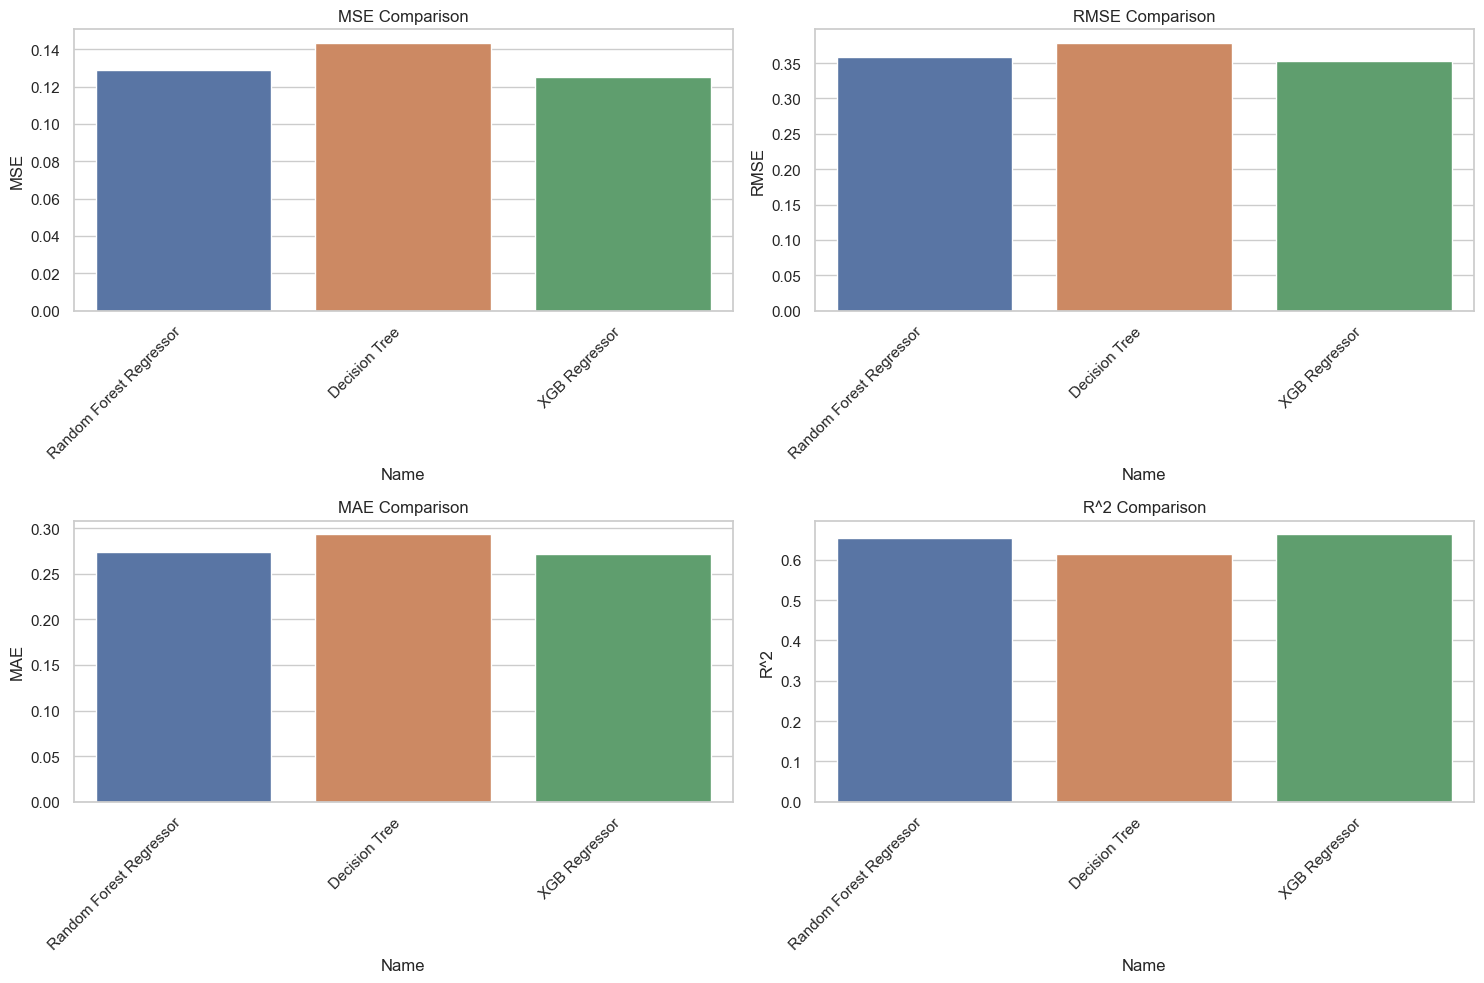

In [280]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot MSE
sns.barplot(x=metrics_df.index, y=metrics_df['MSE'], ax=axes[0, 0], hue=metrics_df.index)
axes[0, 0].set_title('MSE Comparison')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_xticklabels(metrics_df.index, rotation=45, ha='right')

# Plot RMSE
sns.barplot(x=metrics_df.index, y=metrics_df['RMSE'], ax=axes[0, 1], hue=metrics_df.index)
axes[0, 1].set_title('RMSE Comparison')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_xticklabels(metrics_df.index, rotation=45, ha='right')

# Plot MAE
sns.barplot(x=metrics_df.index, y=metrics_df['MAE'], ax=axes[1, 0], hue=metrics_df.index)
axes[1, 0].set_title('MAE Comparison')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_xticklabels(metrics_df.index, rotation=45, ha='right')

# Plot R^2
sns.barplot(x=metrics_df.index, y=metrics_df['R^2'], ax=axes[1, 1], hue=metrics_df.index)
axes[1, 1].set_title('R^2 Comparison')
axes[1, 1].set_ylabel('R^2')
axes[1, 1].set_xticklabels(metrics_df.index, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

In [281]:
for col in metrics_df.columns:
    if col != 'R^2':
        print(metrics_df.sort_values(by=col, ascending=True)[col].head(1))

Name
XGB Regressor    0.125012
Name: MSE, dtype: object
Name
XGB Regressor    0.353571
Name: RMSE, dtype: object
Name
XGB Regressor    0.27191
Name: MAE, dtype: object


In [282]:
print(metrics_df['R^2'].sort_values(ascending=False).head(1))

Name
XGB Regressor    0.663898
Name: R^2, dtype: object
